In [1]:
# importing 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to C:\Users\Debjeet
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Debjeet
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# dataset loaded
import pandas as pd
reviews = pd.read_csv("K8 Reviews v0.2.csv")
reviews

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
...,...,...
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...


In [3]:
# Checking the shape of the dataset
reviews.shape

(14675, 2)

In [4]:
# Checcking the no. of classes in sentiments
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

## Data Cleaning :
   - We will first remove all the punctuation marks
   - Then we will make all the reviews to lower case
   - then we are segregating each word from the reviews
   - And then we are storing it in the list words

In [5]:
# Creating customized stop words
from string import punctuation
stp_wrds = stopwords.words("english")

stp=["phone","lenovo","mobile","even","got","sometimes","K8","note","also","k","day"]
stp_wrds.extend(stp)


import re
from nltk.tokenize import word_tokenize
words=[]
sentence = []
for i in range(len(reviews.review)):
    
    word =re.sub("[^a-zA-Z]"," ",reviews.review[i])         # here we are removing the punctuations
    word = word.lower()                                     # making all the words to lower case lower
    word = word_tokenize(word)                              # tokenising words from sentences
    
    
    # here we are removing all the stopwords and words of len less than 2
    lem=WordNetLemmatizer()
    w=[]
    for j in word :
        if j not in set(stp_wrds) :
            w.append(lem.lemmatize(j)) # Here we are lemmatizing the words so as to get meaningful words with least alphabets.
            
    # here we are creating sentences from those leammatised words
    ls=[]
    for k in w:
        if len(k)>2:
            ls.append(k)
            words.append(k)   
    sentence.append(" ".join(ls))

In [6]:
# Created a list of all the sentences
sentence

['good need update improvement',
 'worst bought ever battery draining like hell backup hour internet put idle getting discharged biggest lie amazon lenove expected making full saying battery mah booster charger fake take least hour fully charged know survive making full please else regret like',
 'get cash back already january',
 'good',
 'worst everthey changed last problem still amazon returning highly disappointing amazon',
 'telling buyi totally disappointedpoor batterypoor camerawaste money',
 'awesome charging heat allot really genuine reason hate',
 'battery level worn',
 'hitting problem hanging problem service station ahmedabad one year warranty change',
 'lot glitch dont buy thing better option',
 'wrost',
 'good charger working damage within month',
 'purchase item much heating battery life poor',
 'faced battery problem motherboard problem month worst life',
 'good slim good battry backup good screen love',
 'headset available',
 'every time automatic kindly suggest',
 'bes

In [7]:
# Created list of lemmatized words
words

['good',
 'need',
 'update',
 'improvement',
 'worst',
 'bought',
 'ever',
 'battery',
 'draining',
 'like',
 'hell',
 'backup',
 'hour',
 'internet',
 'put',
 'idle',
 'getting',
 'discharged',
 'biggest',
 'lie',
 'amazon',
 'lenove',
 'expected',
 'making',
 'full',
 'saying',
 'battery',
 'mah',
 'booster',
 'charger',
 'fake',
 'take',
 'least',
 'hour',
 'fully',
 'charged',
 'know',
 'survive',
 'making',
 'full',
 'please',
 'else',
 'regret',
 'like',
 'get',
 'cash',
 'back',
 'already',
 'january',
 'good',
 'worst',
 'everthey',
 'changed',
 'last',
 'problem',
 'still',
 'amazon',
 'returning',
 'highly',
 'disappointing',
 'amazon',
 'telling',
 'buyi',
 'totally',
 'disappointedpoor',
 'batterypoor',
 'camerawaste',
 'money',
 'awesome',
 'charging',
 'heat',
 'allot',
 'really',
 'genuine',
 'reason',
 'hate',
 'battery',
 'level',
 'worn',
 'hitting',
 'problem',
 'hanging',
 'problem',
 'service',
 'station',
 'ahmedabad',
 'one',
 'year',
 'warranty',
 'change',
 'lo

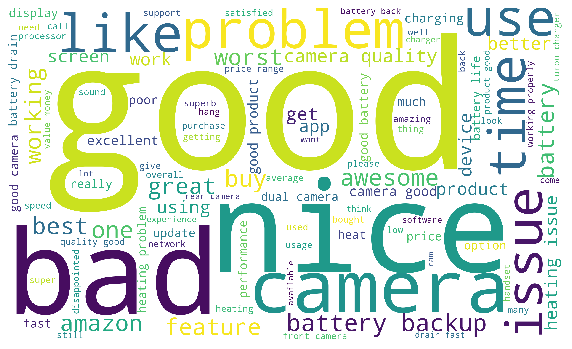

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Creating a single big_string wich will be used for generating the wordcloud
single = " ".join(words)

# creating wordcloud
wordcloud = WordCloud(stopwords=stp_wrds,width=1000,height=600,scale=3,background_color="white",max_words=100).generate(single)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)


In [9]:
# creating df and then checking frequency of each word
import numpy as np
df=pd.DataFrame({"words":words})
x=df["words"].value_counts().head(20)

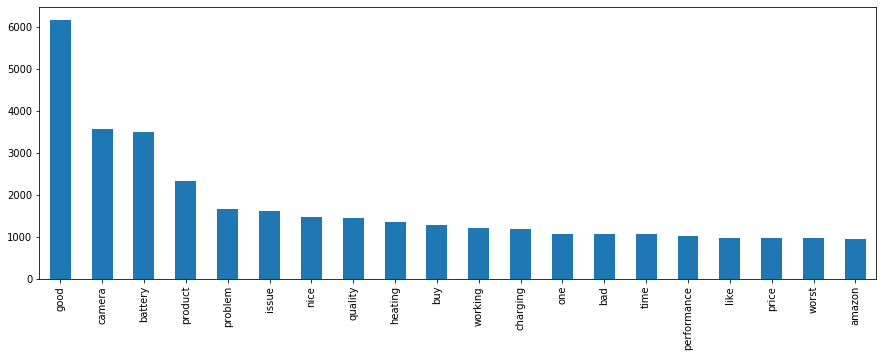

In [10]:
# Plotting the frequency count of the most used words
plt.figure(figsize=(15,5))
x.plot(kind="bar")

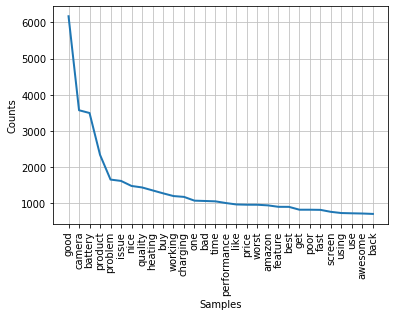

In [11]:
# Counting freq of each word and showing the top 30 words
fdist =nltk.FreqDist(words)
fdist.plot(30,cumulative=False)

In [12]:
# Using TweetTokenizer
TWEET = "I live in #mumbai and #bengaluru is a beautiful place"
from nltk.tokenize import TweetTokenizer , word_tokenize

tw=TweetTokenizer()
wd=word_tokenize(TWEET)
words=tw.tokenize(TWEET)

# These are the words from the above tweet
print("This is tokenizing with TweetTokenizer: ",words)

# As we can see 
print("This is tokenizing without TweetTokenizer: ",wd)


# Just making a list of hashtags
import re
re.findall("#[a-zA-Z]+",TWEET)


This is tokenizing with TweetTokenizer:  ['I', 'live', 'in', '#mumbai', 'and', '#bengaluru', 'is', 'a', 'beautiful', 'place']
This is tokenizing without TweetTokenizer:  ['I', 'live', 'in', '#', 'mumbai', 'and', '#', 'bengaluru', 'is', 'a', 'beautiful', 'place']


['#mumbai', '#bengaluru']

## Stemming:
   - Stemming helps to reduce the no. of distinct words in the corpus.
### Types Of stemming :
   - PorterStemmer
   - SnowballStemmer
   - LancasterStemmer

In [13]:
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer

ps=PorterStemmer()
sn=SnowballStemmer("english")
ln=LancasterStemmer()

text = "This is an example of text in Python while i'am pythonning "
WORDS=  word_tokenize(text)


print("This is o/p of porterstemming: ",[ps.stem(i) for i in WORDS])

print("This is o/p of snowballstemming: ",[sn.stem(i) for i in WORDS])

print("This is o/p of Lancasterstemming: ",[ln.stem(i) for i in WORDS])

This is o/p of porterstemming:  ['thi', 'is', 'an', 'exampl', 'of', 'text', 'in', 'python', 'while', "i'am", 'python']
This is o/p of snowballstemming:  ['this', 'is', 'an', 'exampl', 'of', 'text', 'in', 'python', 'while', "i'am", 'python']
This is o/p of Lancasterstemming:  ['thi', 'is', 'an', 'exampl', 'of', 'text', 'in', 'python', 'whil', "i'am", 'python']


In [18]:
# creating Bag Of words matrix using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
X=cv.fit_transform(sentence).toarray()
X.shape

(14675, 77487)

In [19]:
# this is the matrix which will have the words as features and sentence number as row index
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Bag Of Words Matrix:
   - Creating a dataframe for further analysis
   - Here we have created a bigram dataframe for analysis and  have added the target column at the end.
   - Each column represents the unique bigram of words used in sentences.
   - Each row index represents the sentence number.

In [28]:
amazon_df_CV= pd.DataFrame(X,columns=cv.get_feature_names())
amazon_df_CV["Sentiment"]=reviews["sentiment"]
amazon_df_CV

,aab hank,aachha hai,aachi hai,aadhe glass,aaguthu battery,aaguthu waste,aaj date,aaj jab,aaj refund,aaj sept,...,zoomed otherwise,zooming clicking,zooming image,zooming jpeg,zooming pic,zooming picture,zooming show,zooming terrible,zuk since,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
